# Monte-Carlo Simulation



>If you choose 4 random points on a sphere and join them, what is the probability that the resulting tetrahedron contains the centre of the sphere?

## 1. Import Required Modules

In [0]:
import scipy as sci
import matplotlib.pyplot as plt
import scipy.linalg
%matplotlib inline

## 2. Define Sample Space

### Define number of points and create empty arrays to store coordinates

In [0]:
points=10000
x=sci.zeros((points,3))
y=sci.zeros((points,3))

### Store all 3D vectors on the surface of a sphere of radius 1 in 'y'

In [0]:
for i in range(points):
    vector=sci.random.rand(1,3)-0.5
    if(sci.linalg.norm(vector)!=0 and sci.linalg.norm(vector)<=1.0):
        x[i,:]=vector
        y[i,:]=x[i,:]/sci.linalg.norm(x[i,:])

### Check if all the norms of vectors in 'y' are equal to 1; if "All Clear" then proceed

In [0]:
y_norms=sci.zeros(points)
for i in range(points):
    y_norms[i]=sci.linalg.norm(y[i,:])
    tol=1e-10
    norm_diff=abs(y_norms-1)
    danger_array=y_norms[norm_diff>tol]
    
if(len(danger_array)==0):
    print("All Clear")
else:
    print("Danger")

All Clear


## 3. Create functions to determine whether the centre lies inside a tetrahedron

### The CheckSide function checks if the fourth vertex and a stray point lie on the same side of the plane formed by the remaining three vertices

In [0]:
def CheckSide(vertices,point):
    t1,t2,t3,t4=vertices
    p=point
    side_1=t2-t1
    side_2=t3-t1
    normal=sci.cross(side_1,side_2)
    ref_vector=t4-t1
    ref_sign=sci.dot(normal,ref_vector)
    point_vector=p-t1
    point_sign=sci.dot(normal,point_vector)
    if(sci.sign(ref_sign)==sci.sign(point_sign)):
        return 1
    else:
        return 0

### The CheckTetrahedron function calls the CheckSide function 4 times and concludes whether the stray point lies inside or outside the tetrahedron

In [0]:
def CheckTetrahedron(vertices,point):
    vert=sci.copy(vertices)
    check_1=CheckSide(vert,point)
    vert=sci.roll(vert,1,axis=0)
    check_2=CheckSide(vert,point)
    vert=sci.roll(vert,1,axis=0)
    check_3=CheckSide(vert,point)
    vert=sci.roll(vert,1,axis=0)
    check_4=CheckSide(vert,point)
    sum_check=check_1+check_2+check_3+check_4
    if(sum_check==4.):
        return 1
    else:
        return 0

## 4. Initialization

In [0]:
centre=[0,0,0] #Centroid of the sphere
number_of_samples=50000 #Number of samples of tetrahedra to be taken
sample_span=sci.arange(0,number_of_samples,1) #Array for plotting
check_point=sci.zeros(number_of_samples) #Array to store 0s and 1s based on success or failure
prob=sci.zeros(number_of_samples) #Array to store resultant probabilities 

## 5. The Run

In [0]:
for i in range(number_of_samples):
    indices=sci.random.randint(0,points,4) #Get any 4 random numbers as indices for the 'y' array
    vertex_list=y[indices] #Get 4 random points from 'y' based on indices obtained
    check_point[i]=CheckTetrahedron(vertex_list,centre) #Return 1 for success and 0 for failure
    prob[i]=len(check_point[check_point==1.])/(i+1) #Store resultant probability of run

## 6. Plotting

Text(0.5, 1.0, 'Variation of resultant probability with increase in the number of iterations')

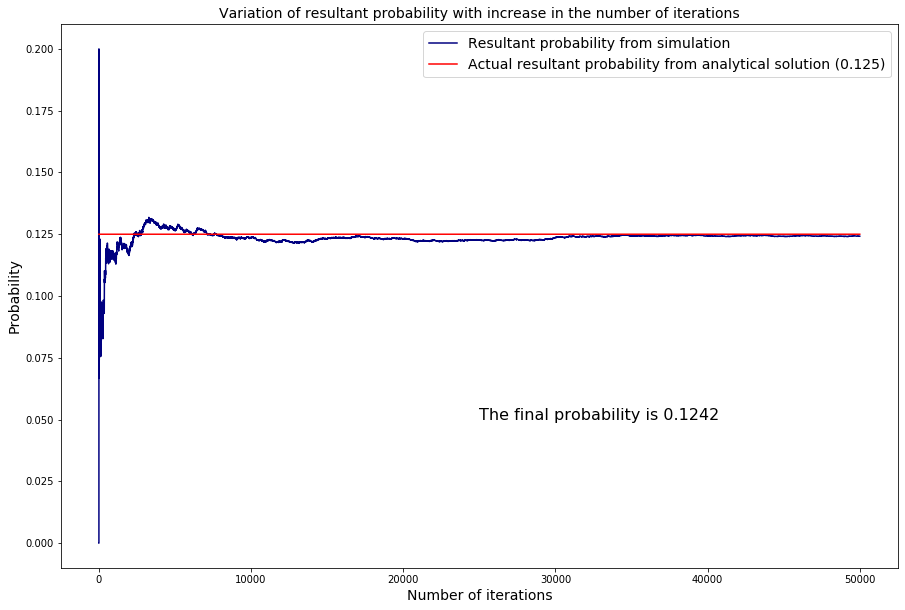

In [0]:
#Plot blank figure
plt.figure(figsize=(15,10))
#Plot resultant probability from simulation
plt.plot(sample_span,prob,color="navy",linestyle="-",label="Resultant probability from simulation")
#Plot resultant probability from analytical solution
plt.plot(sample_span,[0.125]*len(sample_span),color="red",linestyle="-",label="Actual resultant probability from analytical solution (0.125)")
#Plot value of final resultant probability in text
plt.text(sample_span[int(number_of_samples/2)],0.05,f"The final probability is {prob[-1]:.4f}",fontsize=16)
#Display axis labels
plt.xlabel("Number of iterations",fontsize=14)
plt.ylabel("Probability",fontsize=14)
#Display legend
plt.legend(loc="upper right",fontsize=14)
#Display title of the plot
plt.title("Variation of resultant probability with increase in the number of iterations",fontsize=14)